In [25]:
%matplotlib inline
import pandas as pd
import json
from pprint import pprint
from random import sample
from nltk.tokenize import word_tokenize
import nltk
import seaborn as sns
import numpy as np

In [9]:
def json_df(datapass):
    '''
    Load the json file and parse the file to pandas dataframe format
    
    Input:
        datapass(str) : directory to the json file
    Output:
        df(dataframe) : pandas dataframe object
    '''
    
    data = [] 
    with open(datapass, 'r', encoding='utf-8') as data_file: 
        for f in data_file:
            data.append(json.loads(f))
    df = pd.DataFrame(data)
    return df

In [10]:
DATAPASS1 = 'C:\\Users\\cdchang\\Downloads\\yelp_dataset\\dataset\\tip.json'
tip = json_df(DATAPASS1)
DATAPASS2 = 'C:\\Users\\cdchang\\Downloads\\yelp_dataset\\dataset\\business.json'
business = json_df(DATAPASS2)
DATAPASS3 = 'C:\\Users\\cdchang\\Downloads\\yelp_dataset\\dataset\\photos.json'
photos = json_df(DATAPASS3)
DATAPASS4 = 'C:\\Users\\cdchang\\Downloads\\yelp_dataset\\dataset\\review.json'
reviews = json_df(DATAPASS4)

In [44]:
print ('{} tip'.format(tip.shape[0]))
print ('{} photos'.format(photos.shape[0]))
print ('{} business'.format(business.shape[0]))
print ('{} review'.format(reviews.shape[0]))

1028802 tip
196278 photos
156639 business
4736897 review


In [52]:
print(photos.columns)
print(reviews.columns)
print(tip.columns)
print(business.columns)

Index(['business_id', 'caption', 'label', 'photo_id'], dtype='object')
Index(['business_id', 'cool', 'date', 'funny', 'review_id', 'stars', 'text',
       'useful', 'user_id'],
      dtype='object')
Index(['business_id', 'date', 'likes', 'text', 'user_id'], dtype='object')
Index(['address', 'attributes', 'business_id', 'categories', 'city', 'hours',
       'is_open', 'latitude', 'longitude', 'name', 'neighborhood',
       'postal_code', 'review_count', 'stars', 'state'],
      dtype='object')


In [56]:
print("peeking at business")
business.head(4)

peeking at business


,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,neighborhood,postal_code,review_count,stars,state
0,691 Richmond Rd,"{'RestaurantsPriceRange2': 2, 'BusinessParking...",YDf95gJZaq05wvo7hTQbbQ,"[Shopping, Shopping Centers]",Richmond Heights,"{'Monday': '10:00-21:00', 'Tuesday': '10:00-21...",1,41.541716,-81.493116,Richmond Town Square,,44143,17,2.0,OH
1,2824 Milton Rd,"{'GoodForMeal': {'dessert': False, 'latenight'...",mLwM-h2YhXl2NCgdS84_Bw,"[Food, Soul Food, Convenience Stores, Restaura...",Charlotte,"{'Monday': '10:00-22:00', 'Tuesday': '10:00-22...",0,35.236870,-80.741976,South Florida Style Chicken & Ribs,Eastland,28215,4,4.5,NC
2,337 Danforth Avenue,"{'BusinessParking': {'garage': False, 'street'...",v2WhjAB3PIBA8J8VxG3wEg,"[Food, Coffee & Tea]",Toronto,"{'Monday': '10:00-19:00', 'Tuesday': '10:00-19...",0,43.677126,-79.353285,The Tea Emporium,Riverdale,M4K 1N7,7,4.5,ON
3,"7702 E Doubletree Ranch Rd, Ste 300",{},CVtCbSB1zUcUWg-9TNGTuQ,"[Professional Services, Matchmakers]",Scottsdale,"{'Friday': '9:00-17:00', 'Tuesday': '9:00-17:0...",1,33.565082,-111.916400,TRUmatch,,85258,3,3.0,AZ


In [57]:
print("peeking at photos")
photos.head(4)

peeking at photos


,business_id,caption,label,photo_id
0,JzB7NITHQ7gVHGVZ1ntgIQ,Black Angus Steak Sandwich... Huge!!!,food,VZXDC7VBdIXXjE3omVqeMg
1,JzB7NITHQ7gVHGVZ1ntgIQ,,outside,c6Em6dDZ4aVKDI8Lc2BQog
2,JzB7NITHQ7gVHGVZ1ntgIQ,,food,VAoFn_z9QF0qVmT5vTdwWA
3,JzB7NITHQ7gVHGVZ1ntgIQ,,food,ToCK6BSwnST8nIzSuskW3g


In [58]:
print("peeking at tips")
tip.head(4)

peeking at tips


,business_id,date,likes,text,user_id
0,tJRDll5yqpZwehenzE2cSg,2012-07-15,0,Get here early enough to have dinner.,zcTZk7OG8ovAmh_fenH21g
1,jH19V2I9fIslnNhDzPmdkA,2015-08-12,0,Great breakfast large portions and friendly wa...,ZcLKXikTHYOnYt5VYRO5sg
2,dAa0hB2yrnHzVmsCkN4YvQ,2014-06-20,0,Nice place. Great staff. A fixture in the tow...,oaYhjqBbh18ZhU0bpyzSuw
3,dAa0hB2yrnHzVmsCkN4YvQ,2016-10-12,0,Happy hour 5-7 Monday - Friday,ulQ8Nyj7jCUR8M83SUMoRQ


In [60]:
print("peeking at reviews")
reviews.head(4)

peeking at reviews


,business_id,cool,date,funny,review_id,stars,text,useful,user_id
0,uYHaNptLzDLoV_JZ_MuzUA,0,2016-07-12,0,VfBHSwC5Vz_pbFluy07i9Q,5,My girlfriend and I stayed here for 3 nights a...,0,cjpdDjZyprfyDG3RlkVG3w
1,uYHaNptLzDLoV_JZ_MuzUA,0,2016-10-02,0,3zRpneRKDsOPq92tq7ybAA,3,If you need an inexpensive place to stay for a...,0,bjTcT8Ty4cJZhEOEo01FGA
2,uYHaNptLzDLoV_JZ_MuzUA,0,2015-09-17,0,ne5WhI1jUFOcRn-b-gAzHA,3,Mittlerweile gibt es in Edinburgh zwei Ableger...,0,AXgRULmWcME7J6Ix3I--ww
3,uYHaNptLzDLoV_JZ_MuzUA,0,2016-08-21,0,llmdwOgDReucVoWEry61Lw,4,Location is everything and this hotel has it! ...,0,oU2SSOmsp_A8JYI7Z2JJ5w


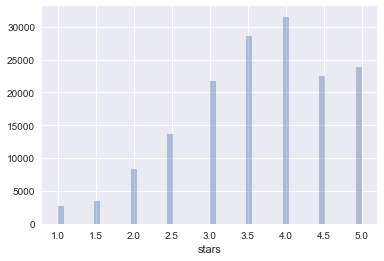

In [61]:
sns.distplot(business['stars'], kde=False)

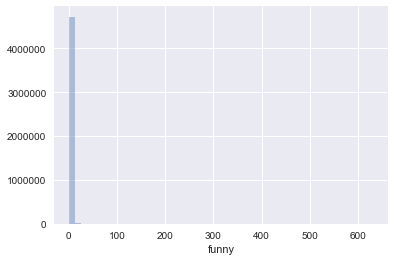

In [65]:
sns.distplot(reviews['funny'], kde=False)

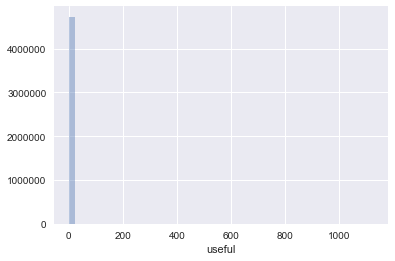

In [71]:
sns.distplot(reviews['useful'], kde=False)

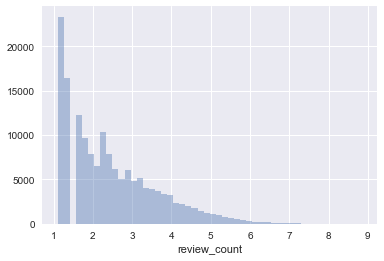

In [69]:
sns.distplot(np.log(business['review_count']), kde=False)

In [1]:
print("WORK FROM 9/30/2017 ONWARD: ");

WORK FROM 9/30/2017 ONWARD: 


In [13]:
reviews.head(10)

,business_id,cool,date,funny,review_id,stars,text,useful,user_id
0,uYHaNptLzDLoV_JZ_MuzUA,0,2016-07-12,0,VfBHSwC5Vz_pbFluy07i9Q,5,My girlfriend and I stayed here for 3 nights a...,0,cjpdDjZyprfyDG3RlkVG3w
1,uYHaNptLzDLoV_JZ_MuzUA,0,2016-10-02,0,3zRpneRKDsOPq92tq7ybAA,3,If you need an inexpensive place to stay for a...,0,bjTcT8Ty4cJZhEOEo01FGA
2,uYHaNptLzDLoV_JZ_MuzUA,0,2015-09-17,0,ne5WhI1jUFOcRn-b-gAzHA,3,Mittlerweile gibt es in Edinburgh zwei Ableger...,0,AXgRULmWcME7J6Ix3I--ww
3,uYHaNptLzDLoV_JZ_MuzUA,0,2016-08-21,0,llmdwOgDReucVoWEry61Lw,4,Location is everything and this hotel has it! ...,0,oU2SSOmsp_A8JYI7Z2JJ5w
4,uYHaNptLzDLoV_JZ_MuzUA,0,2013-11-20,0,DuffS87NaSMDmIfluvT83g,5,gute lage im stadtzentrum. shoppingmeile und s...,0,0xtbPEna2Kei11vsU-U2Mw
5,uYHaNptLzDLoV_JZ_MuzUA,0,2016-06-05,0,GvLmUkjUrOyFH8KFnmT1uw,5,Erstklassige Lage. Dazu ist alles geschrieben ...,0,rW8q706dz5-NnXDzMwVkiw
6,uYHaNptLzDLoV_JZ_MuzUA,0,2015-02-21,0,lGEl24NGj2HVBJrodeXcjg,4,"Beautiful space, great location, staff rock. T...",0,yx8vNXUL0D0HS8rUIC7AFA
7,uYHaNptLzDLoV_JZ_MuzUA,0,2013-07-07,0,cUgvEy5wj7zYE68v1BzzVg,4,This is a fairly new property I think. It is a...,0,zXnH6W74FAJQ7q7b-NuBsA
8,uYHaNptLzDLoV_JZ_MuzUA,2,2013-04-27,0,FSB_BnvysBgH3JYrbFNcgw,4,First time at this group of hotels. Pretty new...,2,c5yp5hxwC1N98MjbV2LyWQ
9,uYHaNptLzDLoV_JZ_MuzUA,0,2015-04-13,0,dhl3ZW9aAEX_T7_um5tfaQ,4,Location location location! \n\nMotel One is j...,2,xJisL5w4wOgiYLokGMT_IA


In [16]:
business.columns

Index(['address', 'attributes', 'business_id', 'categories', 'city', 'hours',
       'is_open', 'latitude', 'longitude', 'name', 'neighborhood',
       'postal_code', 'review_count', 'stars', 'state'],
      dtype='object')

In [60]:
reviews.columns

Index(['business_id', 'cool', 'date', 'funny', 'review_id', 'stars', 'text',
       'useful', 'user_id'],
      dtype='object')

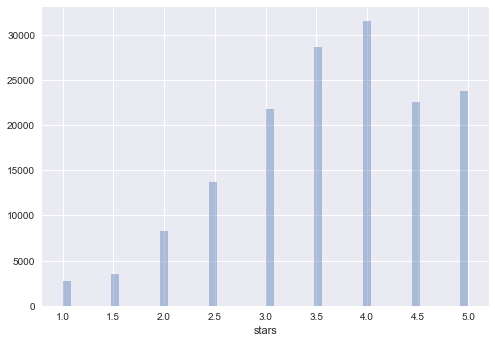

In [19]:
sns.distplot(business['stars'], kde=False)

In [20]:
business.head(3)

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,neighborhood,postal_code,review_count,stars,state
0,691 Richmond Rd,"{'RestaurantsPriceRange2': 2, 'BusinessParking...",YDf95gJZaq05wvo7hTQbbQ,"[Shopping, Shopping Centers]",Richmond Heights,"{'Monday': '10:00-21:00', 'Tuesday': '10:00-21...",1,41.541716,-81.493116,Richmond Town Square,,44143,17,2.0,OH
1,2824 Milton Rd,"{'GoodForMeal': {'dessert': False, 'latenight'...",mLwM-h2YhXl2NCgdS84_Bw,"[Food, Soul Food, Convenience Stores, Restaura...",Charlotte,"{'Monday': '10:00-22:00', 'Tuesday': '10:00-22...",0,35.236870,-80.741976,South Florida Style Chicken & Ribs,Eastland,28215,4,4.5,NC
2,337 Danforth Avenue,"{'BusinessParking': {'garage': False, 'street'...",v2WhjAB3PIBA8J8VxG3wEg,"[Food, Coffee & Tea]",Toronto,"{'Monday': '10:00-19:00', 'Tuesday': '10:00-19...",0,43.677126,-79.353285,The Tea Emporium,Riverdale,M4K 1N7,7,4.5,ON


In [32]:
business.groupby('state').count().sort_values(by = 'business_id', ascending = False)['business_id'][:10]

state
AZ     47376
NV     30571
ON     26520
NC     11299
OH     10930
PA      8916
QC      7273
WI      4190
EDH     3561
BW      3071
Name: business_id, dtype: int64

In [33]:
business.columns

Index(['address', 'attributes', 'business_id', 'categories', 'city', 'hours',
       'is_open', 'latitude', 'longitude', 'name', 'neighborhood',
       'postal_code', 'review_count', 'stars', 'state'],
      dtype='object')

In [34]:
business.columns[2]

'business_id'

In [57]:
#b_categories = business.columns[3]
#business.keys()
#list(business.columns.values)
category_list = business[business.columns[3]]
#def filterOut(category_list):
category_list

0                              [Shopping, Shopping Centers]
1         [Food, Soul Food, Convenience Stores, Restaura...
2                                      [Food, Coffee & Tea]
3                      [Professional Services, Matchmakers]
4                                 [Sandwiches, Restaurants]
5                                 [Shopping, Tobacco Shops]
6                         [Chiropractors, Health & Medical]
7         [Automotive, Oil Change Stations, Car Wash, Au...
8         [Jewelry Repair, Gold Buyers, Local Services, ...
9                          [Health & Medical, Optometrists]
10                                   [Bowling, Active Life]
11        [Barbers, Men's Hair Salons, Hair Removal, Wax...
12        [Flowers & Gifts, Bakeries, Grocery, Shopping,...
13        [Landscape Architects, Home & Garden, Irrigati...
14        [Burgers, Bars, Restaurants, Sports Bars, Nigh...
15                                   [Chinese, Restaurants]
16                    [Contractors, Roof

In [55]:
category_list[0]
#list(category_list[category_list=="[Auto Repair, Automotive]"].index)

['Shopping', 'Shopping Centers']

In [67]:
reviews.columns[2]
dates = reviews[reviews.columns[2]] #date
indiv_businesses = business[business.columns[2]]
indiv_businesses.count()

156639

In [68]:
indiv_businesses #seems like there aren't multiple reviews for the same restaurant 

0         YDf95gJZaq05wvo7hTQbbQ
1         mLwM-h2YhXl2NCgdS84_Bw
2         v2WhjAB3PIBA8J8VxG3wEg
3         CVtCbSB1zUcUWg-9TNGTuQ
4         duHFBe87uNSXImQmvBh87Q
5         uUEMrhJiL1a1pCA_I1SU7Q
6         2eJEUJIP54tex7T9YOcLSw
7         fEylCY3UEH8YJ0Xa7lu6lA
8         kFtuYklkAIlmYw8RZAieGw
9         NqiQdFa93wzUJGo29NbTPQ
10        N9BN9ldVl1FNzcB9_eAstw
11        6s3z3TlpHOIecuSyPEOp7A
12        n33Izvzk_z9_51H6NsQF-A
13        m06OZRFTaKKi6U0omfLq4g
14        SDMRxmcKPNt1AHPBKqO64Q
15        iFEiMJoEqyB9O8OUNSdLzA
16        qrAHt4wWRYWj1sEjxq574A
17        jqp5TibmgJZVFKHTp3XfqQ
18        1cLXGXThDYZ5WK_KpBLtkw
19        BmSJ6C7Y9s3tHotRetVbmA
20        Av-ODv7-hV12If005Pj6wA
21        HmI9nhgOkrXlUr6KZGZZew
22        qnpvw-uQyRn9nlClWFK9aA
23        igcy3ojJbgbpS8K70gvFQg
24        5Ghe0btvM7tXqANnhNB5eg
25        vvB8ebrUsjfNqwWjk4G4OQ
26        l9ABoPi9j_pH9588tk0-6w
27        eW9vw2fE_6EuTWErZRo3mQ
28        ZFGYEsHFo6G4KtlTpYmMRQ
29        ATsUb_sLzDSZkIoBdoO_mg
          

In [73]:
print ('{} business ids'.format(len(set(business['business_id']))))

156639 business ids


In [75]:
uniqueIDs = list(set(business['business_id'].unique()))
len(uniqueIDs)

156639

In [80]:
print ("unique business names")
uniqueNames = list(set(business['name'].unique()))
len(uniqueNames)

unique business names


118580

In [81]:
business.duplicated('name') #finding the duplicate businesses

0         False
1         False
2         False
3         False
4         False
5         False
6         False
7         False
8         False
9         False
10        False
11        False
12        False
13        False
14        False
15        False
16        False
17        False
18        False
19        False
20        False
21        False
22        False
23        False
24        False
25        False
26        False
27        False
28        False
29        False
          ...  
156609    False
156610     True
156611    False
156612    False
156613    False
156614     True
156615    False
156616    False
156617     True
156618    False
156619    False
156620     True
156621    False
156622     True
156623    False
156624    False
156625     True
156626    False
156627     True
156628     True
156629    False
156630    False
156631    False
156632     True
156633    False
156634    False
156635    False
156636    False
156637    False
156638     True
Length: 156639, dtype: b

In [89]:
#mask = (business['name']==True)
filtered = business.duplicated('name')
mask = business.where(filtered==True)
mask

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,neighborhood,postal_code,review_count,stars,state
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [112]:
import math
#business.where(filtered != None)
duplic_bus_final = mask.dropna()
#len(mask.dropna())

38059

In [188]:
print("condensing businesses with the same name to 1 single point together")
#duplic_bus_final
filt_round2 = duplic_bus_final.duplicated('name')
filt_round2
mask2 = filt_round2.where(filt_round2==True)
mask2
len(mask2.dropna())
mask2.keys() #keeping track of the unique businesses (i.e. only 1 Walgreens, 1 Starbucks, etc.)


condensing businesses with the same name to 1 single point together


Int64Index([   142,    197,    258,    264,    283,    299,    302,    389,
               400,    422,
            ...
            156610, 156614, 156617, 156620, 156622, 156625, 156627, 156628,
            156632, 156638],
           dtype='int64', length=38059)

In [152]:
#ignore: this used to be a for loop 
#somehow didn't filter out every single one but that's ok for right now
#for i in mask2.keys():
#    print(business.business_id[""][i])
#print("key length: ")
#len(mask2.keys())

XuLXX5B5W1P-iNpgXmqmjQ
TMd34pqWXg89EYhHoElj8w
KBDRpZkCVJ5N_GSMIk4kPg
EPkV2_H0TRcARa-2IFZ-2A
vEsAPc0fEDP1YPeSQanxfQ
p1IpBoBKKVeZzYkT1lW0sw
W-3Sy3fy85mQdd0ZNFKIiw
1Ds8V2c7LlwSAA3O-9f4cA
L4PI4kh8plShtrcWt6aBTQ
4lpvbMfXQw2rUz16N_KtsA
rtcWSNA3HVehrnUDVphYoA
QMabpBYQ2qAh16GPbCvMrA
VobZRj98tDH7AaojYJD8Jg
Dwj3s0jTQM7-r8joZSe2sw
t6SfYTEvg0o_cfJddsqEcg
qsEbriXbvQVaORyJSkCEzQ
sUzvletCYiIaZD_hbnNLEA
BCBLDV5sxvOebPRswPFFgA
A8y3yc_-_cDrHiApqJlx-w
x2nItJPCZxEobThRyDg6HQ
hJJm0DFmG57zwSeNkeIuRQ
gqGrMnDYEToXOYajBuEvKQ
wykyxd1-DaEEAjudGyiKfw
ll9PWPSzuHudE8J1BT1G2A
YQ--LJ7pvjiDSqNv0TuKTQ
JXYeMN_VyIZyrveANnIVpA
EVe1uRxc6qBdvd9lTWSH4g
bGWI4ukY0PlnXzKICDZdGA
X6iU1PGjoztDwFdhV4RumA
0AJF-USLN6K5T4caooDdjw
ih8JrT4l5b0MYId6mLyBmQ
89-bwvH5mWWOOb00VTUyFQ
bRrr2tmhBnE1uGFqmdFUhg
Ohy6TtDSeJkVAtIHXP7pMw
OgANEur7Bt8YJSd2uSm6yA
MWWOPM-o6lCEQ_SyD9AoaA
b7pkopqvDr7A7S7hlqp6cw
gM4ycpidDBLEFtTuAYfkNg
kqW_BKO3XCOx8ifbzQsnGA
irb0QjnmXY2S_YGcMVjMpw
1AYt56jS2AfHMLWVQxSfRw
prNo0ZAdpHKJaZCyvTBruQ
_XAaKm6lN5aQnPUWTmjonw
x36lkmEp4rs

1RXPwl3RQSNYK4aTZ4Vf9Q
LokO5BhCgDJzVIK8Akc7Mw
3GMgxgK11TqpQq8TWh_7uA
GtioOu-ZcwVJUhTgox4lsA
5ZFI6lky97HxctWJHf4PMA
nM2Jl9GS7IGlluey8ieivg
E0pJPvpOf_H78aWtJAwR9A
Uj8ViXLaksdUWXUoRfP-zQ
Xu4kAWkooHe39d9VvZ0ILw
E2FuxOUs1T1qqKtmq6Gj-A
qHBqkiclBbhnKVj8Pwmdbg
G7Lr3ML_16qrZja631R3Tg
SPuWRtKZVQMBdDR6b4skFg
-X05rsrc5TkgnNdIyew6Ew
ajnY7XSEBLwtUPrrmQOsag
5eNMMKB66grSjG3VBj0G-Q
-cC2BgtL4fBfZx3w6tAgyw
lctxueg7yoa2OQUeq3Ws2w
-W4gdvXVwi2nTkAIjqaJzA
BDDIpeEK8gVdhiglbjEyrw
TFktkD4fR1gCi8zHRmrZPw
VGmru4jWWUf9ZiwvZBWbdw
a5HUZPAn8J_cCyi_qQ29vg
n2D9H9y82NCL4EIQaSWMng
PF5rHGGZ93i7UJP9Fsvgmg
_QcP3WohJjr2k-q1A0xaJA
7NhLscBs-Cj2DfPyVdGrqg
lCl_-LHbb5QTSvac-HQHEw
pfGV7rxls65U-yusYR_zfw
RwxLMhe-uw9Swr_hSlgtkA
oqVcCVbwjcA1LXzGfR2z9w
hGEutUMfbpSdCiekvbW-rg
_VZJQ-9qCQcp431jyLz7eQ
yNF9FqGJIJGqKmQfYALr_Q
4ToiG4m8pS2bx1vwELpW4w
SJJlpzpcL09Qdjr5MaKAWA
p5W1XIMcwYbVlLYyjwMs0Q
M6A1VQEK0OOVEp6UbO9INg
UjN6x14j9Tj9QbDYy-TzAg
IMZE8ujP9-lHpuhbum8ECA
36y5O1SnpDD1cPIYeyU1Ew
f8TLpM04Sf9VnLGOMTXrAQ
58QoAy7ggzj8ukeJ8YmKFw
fRb2qBaL_0U

oX-rPx1v3iIWyBlnxeJMvA
ho1uSlHJTy8lCezs0La0jA
sdCdpWUKM7OnbqIBEYpkcg
GxBcnU3ONa9htY5gPd72BQ
UozyHLgexaM6yQJvR1BQJg
OZAVH8Mb2CGnMSItxw-Pfw
RUVHVrrvbh2bhoHZCBoAzQ
t8dCDJSOOQKK52iiXmnr0w
7HQ81njZvK2znQf2O0vQTQ
OePd7TXC_JwMERCF9vwBrA
M8I2IdqDbJCGL0ho8eFLiQ
URQQqvHvktnVJCMRE2S5Tg
UqLS43qPN3zHdt3GTFwj5g
YCRCFBr6myPS49on2aS2pQ
MkP_RUY-cEF3B4e7hf7KmA
TNzAfeF_cvrJDtFicKoxwA
RwMlwusAtxZc5a3ZYduulg
djZua1IbMN9KBEWJXKW1MA
U8gsIJu3bkqB7LXY88yhZw
8xIWCN6PlW8E897gFgyFeg
FbJFWkaXfIK8NcbFcO5SYQ
TEqsEqIRFSQdDm8jwPHdkw
R0ukZ5FgY_2Pn96Go5mftA
PZq-Sx-oh4poQ1oS3W7f0g
VIDVASjenNoR2UHEo9oQug
VYPi0xi0k8llY3D9tcNzDw
p8p0rz-f2AslutalaaazCA
x6IffPPcCWOnVA40_joQVA
NQauHAQNg_a0z8WndFY3Wg
zsl5aN9J7gTu_s3UVVJ8aQ
i0YtT1DXt3hbZUCw6z0Pjw
Tz4fdGixKO3_HvOh8i81Iw
7zplUDSAqZEU172XUENjYA
sSb41sJghGm2nEkuzzJEBw
ihq99XMgW99dtH0r0FaUBw
TT2bNjvnVNFOanDNYnAffQ
MGsV9nuGOr9fxtzJPwq8Ig
TWT4Se4IEQ21pm0FSMcbkA
6oVYVknJBME9MBvL_rR7fg
H7YymiGTqcSDA3Ue7KwZrg
UUG3NnmxOUnBlQ2i3peeHQ
Edc4OQns2A4lqs1KT3HE-A
_paJE9yQfSvo25BKBQrKZA
5LglLdziapv

sNfMRwBmMKiN_dZCKU9HEw
bRH5RteG9opf5Pxz9HlgJA
RK-OmWQgKMIT5DH0F_RvSA
-nMkyEQsr9o4x8N2uB1XGQ
-Yev39gkAEJ-l4XX9gpbdw
bR6D-aufYlF4SpLLTTyOvw
m7OH9BbovjMAAz98KIQVpQ
O3UDRFNGWaddyt9O1Mh88w
o_oU_Da_bi3tOsLn6WMKPw
8wHrfXdcth8z7Gd_YPrnUQ
Suqo-sO2n3oDBC8ahVIzyw
et87Vxo32Q_3bb1uqTKYCA
T05HHKMcvY6KqyiQBksX_Q
OHxQMmZnJ8HE7VzNfYMFFw
hYpCpzWAVfEbN4e1_NP1Fg
2Yf3vxi5tscYG2C7nGcYJg
NplupzFglqdFHxQ1MjwkmQ
jVDgbdFMTIDcuxF_PUJeKg
eln7e-Y5fxGtGQv--ni6Hg
HbN0Qx_4QnzPcVNZy9PUVA
UjgeWri4dBk8AXQUN3oQ5Q
LZnz56KAX5moG0s31cICYw
D5H_unBtIAOlnnUXo-GxyA
Bm_t6Ka9niKJ-6_QTjkg1g
GQScRlQ4f-3jg1_De5Zbqw
fg_KGtLwAw2IpXin0KdAZA
mGxfKgnASXLMDc8fqc6WEA
V_V02_im07PgRHHXzw3F7w
TTrYd662CZFRPaiwl-sUqA
fL6SR-2uhp-6HbacsePAcQ
_8mBVtt6yhkS0YtT1FGBNg
PLby3di7FpKKIgQP2gBSZQ
CgsUUVwL8EBqcHFxrtkFtA
TdI6Suf6NuT50IJD1dTqmQ
M3_5NSkpAXsvN2g4Bqrcsg
lQMZ2Rd0jGf1ZpekZpr1MA
Uh0wN_RlJhu1lzFDc-btNQ
8WTwjhS_2lR2yiUFU83Tcg
AiPGzLb9HSDcqdHlAPNBPg
X3qrbOkhdCjm0NTBX7T80Q
ErQRniKqfIuDmKs7MRvbNQ
OivhGTXE97VQy3k2y4TEzQ
hfD6i7CDTa34f4nnRIyo9w
R8L9VLO5jHf

vpzm5PzM68FYreooYUoAeg
Yk23uco9_lru4frmDe8Krg
Yf89SREddyw9Zv-SE-F2EA
Yj4mTCz_6AFFSRGJZDDykA
X3cYjMpEMOntxl9gDe9N2Q
UxdCjSjoc1kbk9PRtSSjeQ
hJNjKc4sKgWG__KitlJ1ag
gYjRq8GabmkUggI1WwjCrw
jO8NPCyJ6qB_MfFqFgcV1w
kfxEDA5EpRQi2IP5DlPvTQ
dSfOqiJFpZWKTzqanfk6sQ
aOyAwLETME9GlxtrsIQnJA
HVrao7sr-MIS-z2JB9ZClg
95Mches38GQMw9TXG1H2_Q
QEHnipQSRUlshVQPOBghuw
ZUJkwu_NS4L41AXEbGqHBQ
QrPi1-65XSL0Lm2lWznOcw
OQWqHW089GhQYqg9PvPH4Q
bhlI39W_47VV6VlxDGhrxQ
WRtYonNjG37FF0SRrw_fzg
lcY3rROJhx5eXQKSZ_dkog
4E0sK671C98JW8nakFbUnQ
rCVMHr5kQK5-2kzo52xSlw
AW9u28V3ktAS1dAwOm_7_A
PnT6cgNSeqYMgmE9OMCl4g
LvQT_Uap6t0p2ePpDaCZsQ
UWgSgYo0aYgCrIlN4MmSaA
UXqm21CiFIojOZdALb-AaA
taAH3Id-hx60rwwXxUnuzQ
5PhR-nHi5qikEXqGKQ2g1g
5sXB5i0zQOB5HzD2tSNC-Q
DiCWSyoaBkIpOVUdIO7Jlg
O3AU1lJmNYgm1FWipLnA4g
Nw_-4DFjYK6BDG0CwNwSvQ
F7OsiFk9aLZtqZczA84xpw
KPZJahLqRf1H4AZ5X20ksw
PWPsVOAxWF_M0GQ-7vSJfg
T8rwJJFM2UEoAeDUpRMR2w
SKWdF-eWM3v9LFvFK4e8wA
a7MtBQ5VK8pL1ldwMwPG_Q
zE_IhbAE02ScKIYTNzTEDA
nOivmEk1FCyV69ypu4Tsow
JXvLE5CRN88sccZtNeMIrQ
ddRL0D5QuSe

1d4OiPU75_KvXkgiBD35-g
EyCO8HurmdWYbVCdxPg-Ig
08dHPmiLmCOn0ikddLGv6A
c8DO25hR5lNWOwQmz1hhpQ
wt7rYJEj_GsZdbefS_2INA
kfqR5vuLJhlvaJG0JWkxkw
HFr3uQI9h8sTTvGn3xk5Zg
q3m4RFGfHn7QVet0hE_DoA
hh6OnxhTmfoyLo4prSNwBQ
kD-V-a0FfdCqMOknATD1Tw
SV0W0yaR8HW2eIunt-WkSg
cAeaXtAQrbRGVcNTdjFg7A
vheocFHSELETX6uLGoolLg
RNtLtoUPmWFzhMHK-7GeiA
AHnvBkGTNlpAVTmg-k0Bsg
-tP2nQ4ePuwbOFuKI1HH1g
ZKkCYsyUVGJvNdraHSc1_Q
bypuyrtJYtQqS9-SGnSn3w
wTqPc-KDXONecxCPyEgexg
LVpDZytzMaf7Jxc9jBRxZA
5f0X-QHUIX-ASUpHZTrN3Q
sgvhMnFffkQ6WBSAdtd7Bg
ymZN_CPzgernzM33hRlDUg
CE1h6I0204noLhq7N-x36g
b7-nI5_4Yr0pMkKAgYTCNA
bHWUajFY-fHtNXTRnXh1TA
-mCJVth58q_xMnob1vY2PA
6N6U8WutxoOjpO06Ji4NlQ
uO342W3NYilBA1rfEO8PeQ
-_O0VCqTfHWwweJsj7khNg
Xb9UD98rmSbplDDtVMsUuw
MN9RMoV35ReHFIHpRv3WZQ
alwaIdwsxkqTp0mP9q9siw
4imj7a6YXmuSsIAY_NRTeA
di1cznKWsJlBR84geYytHw
Ko551wnHTGNyBsrdrvFLqw
uqkFSuLucENv8GOi67cbFg
a5jZXqoR-4Br3UhbGTOOoQ
yZWocAychMYJMgc-j5K3uw
PbOFo16Y6seoj3cfcbnjmw
EMrghF81px-wnNqEYqA0Kw
r-jaMF7dyyaiOXlcmQJRdQ
-WVF5DKZeEWlMK8Cucto-A
4GsOLFX5UZr

tu75UB6isr-is_JiSoMxjw
tYKN5eYu668DaxLayGDN6A
8owN7MXEQ4SC_3coyc7WPQ
hTeEouiPuF8QhcKRm-YsjA
S-FDDYNks1fXSoddvW9WvQ
30Oz53-5jRn2A8ELUk1vrg
5oedZHksdryjcv3PjiiPHg
tBhRPMirJ1c3G_rFG0uJxg
o261_fV9RPLdP-Wn3Xr13w
Rv4g5exGrsnpvIaLZTocSw
L1ZY24_ZLzAEAYyZl19xzQ
fUkwjgHLsMmQuguuiuWzPg
zKyF4aWbXsDu9VapZyQDLg
AWBHBHz7-8AsXUA8sayCAw
bgz3u3bhqck2nf7W7iVREQ
fBfi9TH1f91MRIyvPoL-hA
uY1S5WYmPOm7-9zVg6b_yg
41A0vuR9wdWzZNDKbsXvIA
PW1oX9lN0e9apj5TRn288Q
iTcf6h6MFULjvaA3B1A5tw
_IsmLuyEvcKzcBmbMHCCfg
CXjSgS3nINshmP_k4B5swQ
jz-wCut-Fjk-PLIhVKx0aw
58gG8jMwJgddG-XnKUdLbQ
sTC2SI7znjcukc-EtA0wYg
gbxR91UBgVCrw6E7kfMxog
KBfzlzBNUJn-MsgFf-MX2g
9erZGKcy5FmPVAsSVsFmpA
zQKXkvOQxtFDfADKmnXKcA
1mb44krcyBOylDiyx_3ORg
z4Kt3400lm4ZLarZrONZIQ
Vf-mInng89fh3cwk61x6AA
DQbbE26lEFq4rEFSaEEhRg
KHZKC-xiTAC8yoxRC_95Tg
J6NSVc43WrlPnnVHezz7dw
0BGsnXjVVfEQQcNvtZvWlg
IHNSikGzuGgI42DghQtL9Q
VwDriheJXyjyt2fOtAzRqQ
YrFYBMWnRWkRpy9XyMfMRw
lVfrP4a8w-r6tzWN_Ilvng
pdX1V2PD-Yc4329z1v46zw
UVR-eEnLsXjbdK51J8kydA
4rpoa6FmrVdXgw50cf58NQ
oRBHoK2gnLT

gHq85iAANw1eIOVzkzRrpg
Re-2BJlHQrSqN6f46OlqaA
3hfDrgklIwVk6Ad9F_Sksw
zdVDfA4S1EvkPUlfA7eJfg
rt_h4YkQbfqaLMXzWF8Q7A
5uQPZoTXNI0Z_yBymRqAIg
KjQArjtwqsGsZ6P0OBUF6g
8_G7vJ_gaUOoVcd2jw3daA
UYEOnwoGykB-atBbiuI54Q
l7ajNVtV_JmXOop3h0gpKw
b4Nw7T1uzC5SYKuh2ZE95Q
36YldmJEQClr-MDmEIHlAA
JavDJEfCIMzD25fsQIpGYA
qPc_J2M56_hBHvqpncNVfQ
_81fRJ9m8Fn1s8ixPun46A
k4qx8DacgRbM9vpVbWc3zA
dMfinLi-aWZJ91YeOwByMA
PR23v1X54OtNHOmWyE5TFQ
-MnePAaYtfG7Ecc8sYbgVA
4MP7oywk80dRdgUhlqQxrA
qo6_u5_hLFY5s3SQ2Y_Q6A
zK_8IIKiSXZUapswCEvsPg
0I0hxOcOLjKGIBUTG-G-dQ
na-mJkkfQj36IMSwqKxSXQ
VjZ9nX_FTy_A4r7vuRkECg
pJxbs4qsbd9lVYiLLc6Eig
_jdEeATPzBYYBM0Y9W31Bg
CqqrWP6-liXR3v6iqjmvQA
vQMfgU9az5y0vULI3gzR-g
AUXVekMhpgV7UGxXljMi3g
fsOma075jry_LSKQbraUEA
4Dwgwamq4EyeZPtJMQT5qg
VZpzm3HG_YXPHvY97m05qg
Tj2vAGe-VW5iVCZxQ-GZWg
2kZ2WDFA7kpoxpPS_LfCtw
hEjYQlKcn-ClE5rbCN6RBQ
KCQNEIvtU48Mh07uS-_Gvw
F_8jMuQXDvCNbD0pbp68Wg
P4MsVtIDepn_cj-OvgBO2Q
8oSNaQnLGfbFC0uyRUjfCA
BcgXNY9SzSyIstpEFb9tcg
-2S3tYZEy-JbQonqdIsfqg
x2Y_MD5pCTRyaf9dD_ZpGw
MhhFQSRKEAP

BT5CAwvOSYMsfBN8KCZaNQ
0aw3HbxkZ4G7pkPYt10fhA
KRepT7386qgG3A-6YBzVmQ
FLy12rk1O6hpxuYzov9m-A
vJ0m2sONLCjC-1iZ_p_kYg
uHP9DwS9-OqgRa04eXdghg
B1-ucIdMR4Z08KBaWS0CkQ
YppL6BIau6ZXitbGqGyecA
MJVFfOQUMH2iUbyCLAaqnw
rHUikIr_upiuKGsEyBoBdg
xLVyTU3mQ_5n0hor74zjAg
IFexdgbWnmsnhfZsJwe9bw
MXXlfRNmgQBURXKAUwxnWg
dp_9SWKjWsxU-PD3SvwD1Q
AZveQUZIFuMJWrqmrhqQ4g
BHIIG8miKQo3s7bodp2ICA
38YPE4KCvgChy9y6FcksEQ
j8H6BylxltuQzB3A5-rvKw
zUtOk0lRR5z4wt8NS0sToA
YRHU9qa2Ymvj-ErhTIv3kg
bNQVXqWpsToBDcJg_4aWYA
WVY0KpGkKC6l4rhCmeMlCg
Ax2JxfCUjfBkRxcqfA4QLw
3Lzd80pCyB2ZBZch5MrAbQ
np9mgfShV3mgLmg2KqTF3Q
EKeck5myBgPqy2ShyGEjHw
PW_5veynJPPBH-5Adv7ssg
hxEzLvZncAaPyXW_0atsKQ
0IpwKPDV25gub5CRxzC1FA
UaNWiTnUC1c-D9c4XMRuEw
DFp_5lZQt91lNwzWYKbCvg
FfdtF7TFaaus4gUQg0ImPQ
KEt6u-iqpCVcmH-vkpKgLg
FAI9pDhZ-Af4OJnhIxdxOA
f3y-4wAlDodHv-3Qnrg-vQ
3K3gKn5qbRtHekGCxCXJLg
9-yw7Dh6fMl-Wgnq0vD9sQ
roHEmKg-vyVWyDXSBdNXmA
uJGLWrg8dg0HGpzL2eLmnQ
X1hc0swCl-K1HW2Qblk8Dw
65ZGMedBm7TBpWv6fzH2_Q
3vykxItKNuoeQjoYnATXpQ
F-23yT-84jYnU_gv8h0onw
6hfvVrOMmYa

V8bKcWm9BW35MuZ1S4o-yw
5ynzVV_kayd5hfv5Kt6Vbg
wcd89lszN_nwTLHmVVdSuA
Vti2Kkh_SwEXcyWiCIY1Zw
8vkFJ_kA8XxDyjHfmsdEOg
roz-ed8kvBF6fwKBPeJ49Q
uI-dbKk_9cUen7pi3-16Sg
21sGRVR7HEs_t6PdB9tGMw
vAUDxhbsWZKI8NJlsYwCMA
RHOMlCOwON4Uq-xvShRFWw
p_V8gH43zZx0Gh_EA__hdg
t-rivl_ISXvrh829BkRFKg
oY6FIdNlrlk2MO9GGXLG1w
OLrcJhNki2C-XzPYNB-BaQ
Noz9c7zcgJPKyi49DoXNRA
Ccma0kZcURFDwDw2H7tzeA
MDtMV0ld7q0BsQPKNIxGrQ
69zIagFcRQvv5sWrf5vmaQ
tCSEEGChTViEZWuGL9UIHw
yS4-YcT__EH_u51NZfLAeQ
tS65WnHV0QSJvjy9zHS8rg
sApZGFIvZEiBZRSgzcNWlQ
9zclqTtkncm_ayNJ58iJbg
-74zTQjLpOTzgvPTsN2Z8A
2HxaDXZmAOH6LiuzGgNdPA
s6L6SdVYhPcOQEDmNIg1-g
ttsLP8o7Zlu9rPOpVRwG_g
sav06dz4_9fJA0YaSI2V3Q
_4AEKuVxuwBbyL88ufXorA
kIUygMeRLGlXdegKl6E2xQ
NvSJGiGwNBwjYi3m0hP38g
vjN9OONB8Yqf2COy7tIUNQ
QFhftuRh7rv91woFZUmE7A
EjgPwxGTEM4H06cqOTuphw
WoYoY9iKPBrHMnRpJ0IH_A
fJU1KMQzy0tHcjNtM7LylA
1BM4iXyCU-dIRnNQw-JtmA
VUDwlypqw1-DTK_lfEP4jg
ODWgd31ztCy6s-hGJrGjNQ
SRt0CmrwIaWWuDkt0Lla4A
50tjBMTlIbFBxjTRXAVZHQ
STDooDA8ZDdRPOzAMa1f0Q
tphw5Jr3F2wEe0hBnszx4g
57dbqYYLpyv

vYn0gishV27DpfM_loZITQ
JHUtzzUMaM8jC475xY2Crg
k1AZkt8Q4bUObhnrHg3vCQ
6tu5q1pgP7sfDpTY9Vq7GQ
IBoA8jgl2NfhYxOpk94CJg
eXZHezjR7yOfcqYfavph7g
XcSQqYKoOma5rfrZISSMBA
-z3PrOvOgmnrGgLaQ6lJCQ
3frFidAcPVYAFB2RxxkIdA
R6Vg5wbVBzM1bM-Zdm0sqg
xHxHJGD3pTUjdWick9XtrA
QL9pvUN6uOokmIU-xK5Qqg
0iPXuywgu37dDpwLMudACQ
t-ly88_ekX43VWn-aYIQgQ
Iv8AtMbmAgMhiiB1Pp4LlA
5DT2qxCkXxUKW7z_4kOXmA
JEcMyl37f5w38l7cLaKelw
n3Qnz_i6ylWj46nLrqMMsw
vyzfT3_KzLi8WmInwIVPeg
Ft2lpJSeHxqNj7pWHEqIhw
fCf-JewsdoEtRZDzc6Ji5g
Ccf_KMweyD7BDOYHuP-RCw
mybWuvprJdffAh20GamEWg
v4YPhoi4MtoLxFP3ngFsYQ
3Fsp1kTshEMmIOSUi8XhDg
bVPTxKhjj4qyTF7_43nY-g
UEpKf4g8oaAIr0ZIM0TXgw
HIU6U6AgilhEWVy6BNE_Og
eRZuxjnaMviiVyvhejwTBQ
Wsk9CyM-FhybMA48I38JKg
WTZj0hHhwq2GaqsLMXQWhw
DYWTFu7NQO05Db6cPt3zvQ
tCYknqUdD-4TnEn8RtxBjw
wWWpEyUkXhvnnRGr6VHFBA
OnLkSXUxaHvqSj76TvNc_Q
3Xr6BBkmrFZ9_9Wgp6INGg
7kfro-ryD9kjr2NunnWYvQ
J9-xa5p7q1KltIoZPoWiFA
TAAhxi9Tml-8wHZWbZc2UA
2EhTi5TPMZ0tavziHlKVOw
2KkbIWBosdqnbPwt3KfYRA
ikFDRvzVUoHwmMQnMxZurg
M4HMPiR_lHPgOUL2CEihoA
FQn9Oqbms1O

B7lWxgPmJPJJ7Mz2OL6aAg
H-zvurl5D4SFyVKUgJ9bYA
CCvljmpcxvaOGobUeweY2w
ChZUym-m7ZcH_mfIlv2ckw
jtHoGiJLIuuoTIdTwJ_O0w
IqAQjPSdGVKeQzNeme-rNw
arFyWH26WkKjGEnh3FNXww
MfQXQhEJgtpoDvChDRcYow
bUWLbGxs0IPECP5JLoO10A
ANqFyIlVaay7-iDKjKOQ6w
anfgvbiobw4M0Wnvx_os3Q
4RJ1TwPI9rHp0Vcc_eZCiQ
cwVEfFh-XFjHGprNZ7hlFw
LLmSBOKcRXszLdcyVIvbHg
Lw6A2cDHrRpRKoAag67Y8g
Voy_shxcm2YnHQOtfUj1KQ
cjN5hZuQvZqvceFgRWxcWQ
MKUpzdjfDqC_Z1Y_hNmz3w
w4u0y6NEPtV98SGG4wOKnQ
gloqawubcoXctPYWva6GCw
takFPwwTr9Pg3j5xfnb8zw
AXCqbtNmeLxaNBgMswlFpw
3cHL1r5w2oLYH-veijtweA
gzUWf3hG7fMqSkvuayrFKA
gNmo_F0d173s8fnnOfYZ1Q
mA9cKhzB6OGue-LOeTdqlw
KyNvbKTViD5sH3dE1wR2dg
K1QL6Yha3ZVsXWDMw6s5hw
VUksB6cLSHwY_v8bwlOEMA
pDYtNQVbvNIPfYDU32uk3Q
afKlYlV0-l2PBUDYz5Fysw
XKw7Kgnv6xNHdC6gayShQQ
Qk49X8OrbzbG5Qa7VXhV2w
4xioa5IWUTYEepxCiqRMtw
0-ZA4TTKlHYGIQJj06G0-w
wKQthQiyzj1vxwkpLNWzTA
7N_KNmcSkgQHqMh3QAsrLQ
8EZZKsZ9Iuwz7Lem9NfN_w
hPO2di89hgfsD9inbKl7BQ
eNrBPQA92s7ckh2FOWi8Eg
g6OnbXvrky8HTtRFWVL_bQ
9txQt2N_Pb6MhUplnh9iMQ
rCMXa0mMus8rt9zOLfLn4A
-TGwtTiieh_

VDxeitqK4xlUp0eF8Gi9gw
RaAgwcXy-IkxoESXz5GrUA
wQKmvBjIMH0tRzpuw1iPSQ
sqfXnYbX8o1KtIOrarA3MA
AkKZ8bK9KoRUlAU08X9xrA
k3Cz5daq1w78YNUqgcGMJQ
9ieAERCkT_akyrxTS9NQNA
HkG8Ucn1E1R4acyhFrywEA
EXSaokBb2gC4V5MQVUfh8g
RnFuYxZSZzuAJSSEBFj7Mw
hNxyop5d-1QGftzlqUwbvQ
gdtZA3sVQ5Hk-3oPBArdLA
tqdL7aLotkmKIMHCczo3Ew
YtRCzmZ9LeKSBrg6ZzjGYg
r9274utz94-FsCFEUPNWag
zo3PaO9liEuJsUL0wlPEiQ
nbVtxapTeq5HELUeNRgc6w
79o2il5W2Mr4JwU4hTR0zQ
4OLeVcwNJcaRYeovHfzv4Q
9bUUnGfn994cK0uB8NmuOg
T_s4IcIJf5ZHyy8zC28UGw
e5HHNtD7gvZ4WM037zYuKA
7c6d1r-dzfIGBJvaMw37MQ
Nf1ZtgHwg0Mu5lOaJYgDGQ
JwhzDMzaflk30f5ddZh8KA
TjziWy83MOEkWDiO07RwRA
FNGC0aEygQBLnlOnJ-piWA
FeOMSC99eo57SrkoRpLKuw
BodX1QmIT4PD-GoLa-cMQQ
mZmvnl5xaQgnaY3dam8joA
kZkDiB0DwZ_FKy5fvAFRbA
XM9qnJBQ4IVdb5tr_y5TwA
pJlHbIoePemy_wQVpWTR2g
Kk4mjLxofctLfrdknbPKqw
KfyHN1LYS32ZPZ2AaGZZfg
7f55n_sbJsATZVjwRGXPYA
iFrOVn0-f9VlYRMaRwBNRw
qUWqjjjfpB2-4P3He5rsKw
eAvq38EeNn2CDjMmoa-DAQ
aPvvjVN_JrK0fcyixNOfcw
Q8bVGabFAYCHA9gi2q2YUA
fSLD48P8g4YYG8vig2ivtw
4RMeoTag14FKnLlMJBA5fA
-r9pogQoy2r

bwG5hcJbLIk_VLoWde5iQA
gywVAB1bpriEsGIMT3wk4g
4mlc9gZb4PazNz7ZQN4dWw
wVuIwsYDsCE9eWe5HDBGeg
qlsAl7z4NYuf7CVpF2BJcw
5mG8NptNZtvOJv1wriHCCA
wPei6JKotMz8jsEKbohmnw
ul-ckIB5qR9HdH13DyU32A
U9x7pHzxDk_gJF1pTecQNw
bU6IZNKS7NcFVfZppkTHAg
xB7lUrTvm4eHK3q84PKVsg
YCZRD2nicNhLTEMPGcbPXw
faXQgC7HO_XttvxfJ5ygwQ
KRHmUFh8k21hWsS5Xu-d2g
onbDSoWH4shlo2Hzo2Xy-g
bY7-10m1iG5vRZTM8KpKMg
8fB3OodPzYuagvnEWzULeA
pApj2g2hbXEJfp0-Ib6oVw
zitXLajbETOuHQJfok4a4g
sHSdzn28a1UHzTETE6phtQ
MbmuByfu-M5EfazDSDqbnA
U8EGnCbp794XgOZJR6QMNw
UgeOgv-IxHdMi4Fr49nnxQ
taqRnVCqoQmiDuKp4E6FkA
77_nGvzEKmqbWVwkG8pq8A
gsqm34KlLnOgo-yNPbZbYw
1cUom4ZcoWXy0HAd3ZTQqQ
87H0nrGX6eO4eYBe8O6tQQ
TAqpvnHOb9PGBqMRepk1Dw
pvYVHQsz2ZsOA508QunKHw
mrA-h8F9Z3IfsIGlVGIBcQ
XojgvK8FoUIyyhECfWXOng
drz03b9SK0s_yr3vEjmjDw
7fCwv-_i8lSOunrANllmPg
utc3FUSX4mPErcRcoTkFYg
9ZZYPd46HKq8ZIpUbNZfmw
1DUu0NnQvKtvZIjE5A540A
NigZ3jcwQ5dMqIhcLDD2vw
aCQbOhehLeej31x6EMY5eQ
WhsOeL9c27C_To_qr2OZ0A
McVRGoFuWWvxy-ZGuvTJEQ
MSmKD4q_kCmvGiy_wt-bUQ
LKDGDUiDKTuo93gwF5guPA
tlGgRylE0oU

mMilD4n88Bj-ntR35EZUMQ
Aev0VbDs6LvcQiq_K8EIKw
K1WGxpKx1OoI0N1I6LRsyA
_aHzOfX5DFjlEGDh1VgHlg
RGtxZSmqxBzAFWyopvJoJA
xqWXh2-s4ftO1D-6nhWN1g
S_VoH2qPxjm5l3MeuCgunw
7IOjQud0aybhbBFiYqvHXg
qMT_KzIhWnGaHy0KV0LWsw
dPWHFb_sDduzcJdOZSqR5Q
phTLTkqSvylLkmz5wAwhTw
J28BGjxTkrceKunNwwoKNw
Uo2DxgZzbI1_1zJXtyBmng
Kp6WQTbOZ0-0kklGYl3qhg
haXmycIh7bZx9N0frIlZoQ
Gcn3ZLar7V3KbpUXU463Hg
KxmSNuLEjWWs2LHKOYboWA
2XJRUhxoSrrUlkRAogPtcQ
zMm7sqSGoExRrDeWkV3NAQ
quNsF2gdqKulu5D6pvZI0w
vsvxvBvDmC7J6fxQ-lUNvg
MIBi66jl0rSVJsanYziDQw
xBq7I2cBn92RQ7UqsOp2SA
IyLWq2UON44BZ76I7lcMBA
E5AMBRf_2ZdawMMp1nG2eQ
vf-OLMuP-EB1vlqVGUx4CQ
urnhzFRrWwik7UlDvcZhRA
TPKkbzqzjgFMMVGYdNNYtw
TFiYJAHE93WLXvri6JGS-w
axFXzhJZei9DKUbsrMHVjg
7_08jLr277WpzXkcERXhjA
fSMIj-eFFuMPOn8X0yYskQ
OBLTyhDnr7GAPRI_w0LThA
M9TjYmTgHayJ22cNkyvW_g
Dr6z1gyCKUxsuiUg6p3HrA
UZDoRmJzWquqy7jstth1FA
c-uuAPbSpRGR0vPUHlRQRw
bsbU2Pk-aacIULmRDU8y_Q
J8_AGg7Pb6s4B75MHBMEUQ
Pubg4srUujBbKpnURaGxCA
Wrmq3z58S8HE7rkmrJXpdQ
u1pcCzxSSQCV0-9yP5PQcg
Vm9k7pwQexmf2KpxTVQjRg
lnbSxVGViVM

w6HpRe9hG9pB0lpKWeg7Jg
mnQjHawbLXO70vXbzCs6yA
35tWXOOJpWB2feUAEJyJyg
vHbbjyYsk2e_hOM9ytlzfg
xpnKW9566jhZsWHEtLH0ig
bv8g1l-cbLatANIrszzoMA
j6wN7ZFx5bl2t4KfLaAbJQ
jtev1zmWMj3M33zpyadhdg
BDCSaCKVEuQNtfgayiqbUg
fsBkvL_4dOEO4A2DnhG57A
cShLYFiF-Bp0fJrx42-knw
b0VR_Ze2LXXCGpQuj_Ir_w
obtnstR14YCxhp7B_oOMEA
kX4dzdrbGhJ5bXZQdiH2tA
qFqueIKCVF5PlXmjl1YY9Q
Jg3z4A7moA3Oh0df3ll7PA
jzr6jW5cQ0jpPhEo4kGMBw
lMsXrkgw1Ye0wD4PgmypFg
AdHBtjNeuuAU4w6E7NCkfQ
Od8g4OV5k5owgVu12ffyQw
XGp0pViQXgtZXpsx6ofTyQ
rR78byduRdl-iqcy74oDow
vEF3eCf99H1A547iteIY3A
bumnC6L2ZL2mLk8srO2deQ
8mS8WirbT3f7wWOL8mkqMA
tv3EmaI16tyQpwSNTaIQIQ
b0JmcgvF1RKdYsqGGwBuJQ
60Sl9FR7jD5YcrT4yyL5Fg
tvlHgHfBsmmNFbnFE06sgA
ipHubKhzQxSZvaN1PncUWg
jmU2Q2kxRNmSQlEr4RSVew
D6WpqR9w-Suwie5wbD7Cmg
TjhXJJgZJFn5Ra6PcxgtWA
9pvJiPUzB5JTqhNTloKjvA
rd8NXOBTsASiXriuooki_A
FVY1s_lexa9oE4kBzesaLw
GzW0K-j1htLD9LpJ_PxK5A
aA9U8Jxfx68A_rZeLlkTWQ
pw0J39lSSInvDuxVKek72w
Kpkp-GrhL-yUHMOtg0deWA
bOJXwHQshIQJLJa1kqVZIg
XEQ180dfAo0dxaiaXEcSFg
SThmy10YhS13oFgT990Xhw
1oTsr0b56-C

J1745Zf4rryUY6BC1DCC0w
Eo4s6CmPpEcXCkfg9Zk_EA
P2O8l7IXUTHQmDZEq6uLiw
2MQLD5la1kE6n0-DcIVu7g
Rmw9HB35S9qobQKN6bXgmA
cHAhW7XJ2no_qzc46HpohQ
jOEcpy_XHmVR6c9tRcntXQ
EllcHdTOyvsfjPs5Md078Q
ZpljLsuTODf3GuXGcW74WA
ltqvLrYq9QjeQjQ1NlqLcA
fv2cCHRmH2snwJz_TPGcow
mwteIVYDMKxe1Z7QQixz3Q
SuLWjthg67BPflDYp_WCmQ
PnUIxpOR7eEY6NYOYQdY9g
i1f8Suq2Bil36m0O1BPFow
_dPQ47_ToBlROMZHD37m6w
HdlbsjC-7uQTars7399TrQ
64gtZKZL3gA_CO2zJwvSog
pODquGPiGwP4-RoY7f4xtA
L2W0QLXIIR5MEmhQwZk-iA
tjqK6lgvoIbRkQ7QuKRAFQ
0ktWihvmKQiPrXFXhYotCA
bFRnfA4FrqalxE3njXj63w
zd4LA8G3n_2vfhxZNo4iLw
tUFMDX155FxhNX3sQb2dDQ
0WhxNqfHfiuolkcrCo-JHQ
wrQxV_guk0ntqJWnJlK0NQ
c8ongEEBmYFp_Xy4NKyzSQ
j_prxgHnMvuRdrGjAI9qXQ
0zLE2Qd7AjDzRCjfSEhv6w
GEjAMm_6lj0oam2IJQfEPg
txWOzC3bkYMkPg187JDEpg
nTNvXWWEw4kCMhv78pMHBA
BSQgdjMm5pYSWuGyr-8pIA
-uYnPpNwsjSpGv3IB219RQ
p8zekN5mbE6qNF_re4Cd7w
0MawqVKJgQdj052D3Zosmg
GOpSblgq5dVnLagaKviXfQ
qiRyyRWt6jmAxcoVW0-WHA
RCE44XuZ4KhEgD46RNEQXQ
o8AZ7uHNU8tS-KLwCdPICw
5TFiZOGlhyYdZ5U67QWReA
jCNKLiG3QcOiu_vHNdXwNQ
d5sU8KYPv42

PmpIoK_i_-xz8RUsJT1kGQ
jXesESAWe36uVfwW6dQHhA
GKC6EYmFFOU245qBtVxetw
8BE9Zaffm6CS_btG-PHi1w
jRfKx5zZbg7UJienGKFG4A
l5Jkkp-5EF07RrxrqiF6bA
F_B0rznntVpRkryc3kwHpg
RkagUGtiA_cUYSv2M_a8Hw
tgub8uhOq8qjVrkI5IabkQ
B0sMwy3rV0TzHV-4eZ3Erw
8gZ_rKYg7Uy2EIelv-WZ5A
4wQWc6N0VfwVqCNxrurrSQ
gLYsB1cyxcSBWMDFyjPjaQ
Se7xRX2Ys3ab7kH3xUcFXw
xBRkoD3hRt-aQ5UCKPnhOQ
OVt_8sGN8GhfCAkyQAQuWQ
nmE6VanBNs5ejtppLGTQww
yiv9z_p7WTKCZ9sMi0j2sQ
QB_KRwMlC-AtWdqWQ_Q_mA
lKom12WnYEjH5FFemK3M1Q
7LHm07nal2dGwupqVVbYrg
9E1q2uEMd881wnruicNTUA
UQ31DsMtbeRqHWtMnmaI7w
9CNObWIk7w8poCo5IAtgmw
k-YxoQSyfIEPcSHu1cyBhg
z-xawhjTY-s9uDfV8txQ3g
m2aCqu94pc-Niv-zlYYVYA
7UJiUXfKuuGMK6o1Y3pkiQ
xy7wqunklFOIKLeeXRByvg
8OaXvfag7E7oznV4rVb7vg
YFxbYGPSSwkaqVl_iNdkxQ
8pf1NS1va5YX32UErAsy0g
5AEXLDhH0xOoAkmjUgVttA
Il21_URvlkQ89uUeGPGmaw
O9JoZ4fV0iafF7LmqyEGQA
MCG0-o6mzLCLvwayhSwQLw
7_582HYkh5Ki9n5aWK8dmQ
L-aDFoHDcVG1ImCoG361jw
RDIwHXfEOoUYM5jnMzdLcg
4mRaVOEXkWgHtlaynLC0xg
s6KEoNC-rR79704_1ObFuw
qlkjrLAzVN9ow7tWreLeXA
gcOBf3Dt78Uev1BcyLy-Pg
KDa4XDHiz13

ZNVCrUxpMQPxO40hamEaKg
rStNT1Xt_9kaLddHr5TweQ
_k-GxjmoJYelsGHA5NIPiQ
SH5V6fG2Rd5eLHh5vrWpmA
RNdcUG1sCTLdUo8dEC9NJw
nnls26N5dNmJmsz2SZE_WQ
D0mNnxq_N5BQsjShAfHUMA
Na8TXwmGdqR4CaQINi2ogg
pCVQq3jzfrT2CNHAIMMy0g
HwubpLEr5Hi_i1ihpN7-4g
zRmGWov54JbpdrWpuZuqwg
pquz4eXd3uh-BauXiIDotw
HhpRL-LQV4Ns-NkznAB-gg
c3I6_UVuzDYssaGGy_Qenw
G0JqA_8SBaL8TGXTz5dJGg
rwuiLDAkVUNEJex-oQlA7g
wwoOWTunPh4QnaKW11Zl7A
KedpWqBphmRopwBd7trzFw
KKBPzjvA35HpT1aQ-qbCNg
VQAyKvF5d9Z8KIQdympIRA
TP7M7iU9yNVn9uvTe6ml_Q
kRarmb0OqNzyrh4GMZilkg
fmgGNZyZfeCU8fug5LnpjQ
SU56w479vUfFHsvmvQIf7A
1EbdmUMbrS12DougfSOqHw
217u7Wad7y90x4el26-TIw
wQ7He_M4aekw7YCEgvWk7w
NMLAAlor8bABMCAhNvvABg
uRkK9ApafeJeQXBKqQG4JQ
yZxl88lyKIc8n4MvmWftBA
smEBGmtg-U8Rxa2P2jKClQ
0Tiq09V_kdMFPa1cL6I0AA
F8okm6bnvmAlvCG-rubSJg
ObrIR8HFfnEQX-nHu6wv7g
LtQqmfYa7jaNRVgAGtSkvA
5sqC0kX6lBvKR983T_EBcg
gCY17N6YBR8gTMveklFktA
lFiE1KI1Z0tmzVn9_1lcXg
B9xUHu7CtjkpMv3549NY8w
oka8zQK5rE6CtJmOYorC4A
-nZwVZqlk_ET-dpTtvEqPw
LBg8fqw9z6uCdTrVq8rihA
VZbir-d9wd_Vp4sgeTVcCA
iZZ61xxODHX

TLZc69bI7rRhnN0kRTCyXA
tcOP56tZe6hlmdUHX2EH5A
ZDx7kt4aOPTlmYTqXDrTGA
7KKugTC6WXZpypifkf9i7Q
dMEo-GjWAmTVzq3_qeQX2g
4QZmLAOqhGWYuMSOC40vwQ
I_WWH2vYccjz-QxW3u1zJA
GkR3S71b3tj32AAe_wgXkQ
mlCDsdVFuZvRGrJTfQ6amw
ovhQB0fQn5E-YRxMDKh4AQ
ZJ1bpRbX6H9liNpIbagtXA
wMaWLXh8xBgStWrAbGNIyg
pcreu_9klIorF3DTguh1Rg
uKoE01uesejMr89mtFkCbA
JO5_Frcbp9J732VNn-I3Ew
5uUACWfCXMLjuL41O-v4aw
vsprMws280jndHH-ZKwdcQ
2utNYvpTjZSZ73fmmyJuWA
YqQagw5jdCYeBhFTsIFWcQ
f5hKCevF_qoC3tWkQHUS9w
vAr3FWdgO3ZMazl0NorO0Q
vRGVXE0CuPq6qA0k_3nVoA
9xW10XVppfvgrftu_OQwTA
FqQcDCC-wfZgkcx5hwGFrg
ULEHMzCrzGE2ivE8KFwqYw
5eyMV7PEPqF4-K8hR-7OJg
IfX9MOeFSz8c9SO9o7RDvA
btR-hXopcxqMxGk09KjgxA
h6NRLqsvUdUtLWrFw5oi0w
1eOVLZKtcd19YIKIHqvbJQ
_22rTkTXUjzovPpt9tbImQ
hlSj3nHeSNHujnagbWXlhg
Hx6HNJfEGgllQ3-dyoNDbA
uW0BwX7FN6uikP6WaoXDag
FxsmyKVB72O3L9Jr50SqKw
x5DQV8-9uWfnsYBiXZVtnw
gLbqSt4rbghqOLK0y13oVg
_TGcRp4wyVbvvDsEHXf0Zw
nyeIcJRPs8n199nW4OjpSA
G09kuZ7Z_4cdIv0MRwV_LA
k-4gwXT0l0gtS7zYb0ok9A
z-m0Dj_ea_SQra2kYds1Dw
2a7BBQ1YMCCeQo8uoEUJ7Q
accTI02PVL3

In [141]:
#5757 Wayne Newton Blvd is an airport, second one is a shopping mall 
business.groupby('address').count().sort_values(by = 'state', ascending=False)

,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,neighborhood,postal_code,review_count,stars,state
address,,,,,,,,,,,,,,
,5167,5167,5167,5167,5167,5167,5166,5166,5167,5167,5167,5167,5167,5167
5757 Wayne Newton Blvd,87,87,87,87,87,87,87,87,87,87,87,87,87,87
3200 Las Vegas Blvd S,85,85,85,85,85,85,85,85,85,85,85,85,85,85
7014 E Camelback Rd,75,75,75,75,75,75,75,75,75,75,75,75,75,75
3111 W Chandler Blvd,73,73,73,73,73,73,73,73,73,73,73,73,73,73
3500 Las Vegas Blvd S,68,68,68,68,68,68,68,68,68,68,68,68,68,68
4400 Sharon Rd,62,62,62,62,62,62,62,62,62,62,62,62,62,62
3799 Las Vegas Blvd S,61,61,61,61,61,61,61,61,61,61,61,61,61,61
3131 Las Vegas Blvd S,55,55,55,55,55,55,55,55,55,55,55,55,55,55


In [278]:
airport_data = business.where(business.address == '5757 Wayne Newton Blvd').dropna()
airport_id_array = airport_data.business_id
len(airport_data.business_id)
airport_id_array.keys()
#collect star ratings & time

#TODO: NEED TO GET EACH BUSINESS ID IN THE AIRPORT_ID_ARRAY LINKED TO A REVIEW IN 
#REVIEWS DATAFRAME
#THEN, NEED TO PLOT STAR RATING VS DATE

#reviews.stars.where(reviews.business_id == "uYHaNptLzDLoV_JZ_MuzUA") #works

for i in airport_id_array.keys():
    #get stars for every particular business id under reviews 
    # works print(reviews.stars.where(reviews.business_id == (business.loc[i,:].business_id)).dropna().mean())
    print(reviews.stars.where(reviews.business_id == (business.loc[i,:].business_id)).dropna())

#this works! 
#for i in airport_id_array.keys():
#    print(i)

1622897    1.0
1622898    2.0
1622899    2.0
1622900    3.0
1622901    1.0
1622902    1.0
1622903    1.0
1622904    4.0
1622905    2.0
1622906    1.0
1622907    2.0
1622908    4.0
1622909    1.0
1622910    2.0
1622911    2.0
1622912    4.0
1622913    2.0
1622914    2.0
1665902    2.0
1665903    3.0
1665904    2.0
1665905    3.0
1665906    1.0
1665907    1.0
1665908    1.0
Name: stars, dtype: float64
1566728    5.0
1566729    3.0
1566730    5.0
1566731    2.0
1566732    1.0
1566733    4.0
1566734    4.0
1566735    4.0
1566736    4.0
Name: stars, dtype: float64
4339220    1.0
4339221    2.0
4339222    2.0
4339223    1.0
4339224    1.0
4339225    2.0
4339226    1.0
4339227    5.0
4339228    3.0
4339229    2.0
4339230    2.0
4339231    1.0
4339232    1.0
4339233    1.0
4339234    3.0
4339235    3.0
4339236    3.0
4339237    1.0
4339238    4.0
4339239    1.0
4339240    2.0
4339241    2.0
4339242    2.0
4339243    3.0
4339244    2.0
4339245    2.0
4339246    3.0
4339247    3.0
4339248    1.0

2957813    4.0
2957814    5.0
2957815    4.0
2957816    4.0
2957817    4.0
2957818    4.0
2957819    1.0
2957820    5.0
2957821    5.0
2957822    3.0
2957823    3.0
2957824    4.0
2957825    4.0
2978385    1.0
2978386    5.0
2978387    3.0
2978388    4.0
2978389    5.0
2978390    5.0
2978391    5.0
2978392    4.0
2978393    4.0
2978394    5.0
2978395    4.0
2978396    4.0
2978397    5.0
2978398    5.0
2978399    3.0
2978400    2.0
2978401    4.0
2978402    4.0
2978403    4.0
2978404    5.0
2978405    5.0
2978406    4.0
Name: stars, dtype: float64
1328159    1.0
1328160    5.0
1328161    2.0
1328162    2.0
1328163    2.0
1328164    2.0
1328165    5.0
1328166    1.0
1328167    4.0
1328168    1.0
1328169    2.0
1328170    5.0
1328171    4.0
1328172    1.0
1328173    4.0
1328174    5.0
1328175    1.0
1328176    1.0
1328177    4.0
1328178    2.0
1328179    1.0
1328180    5.0
1328181    1.0
1328182    1.0
1328183    5.0
1328184    1.0
1328185    2.0
1328186    1.0
1328187    3.0
1328188    2

3193653    3.0
3193654    1.0
3193655    1.0
3193656    4.0
3193657    3.0
3193658    3.0
3193659    4.0
3193660    3.0
3193661    3.0
3193662    1.0
3193663    1.0
3193664    4.0
3193665    1.0
3193666    1.0
3193667    2.0
3193668    2.0
3193669    4.0
3193670    4.0
3193671    1.0
3193672    4.0
3193673    4.0
3193674    3.0
3193675    1.0
3203110    2.0
3203111    3.0
3203112    1.0
3203113    1.0
3203114    1.0
3203115    5.0
3203116    1.0
3203117    1.0
Name: stars, dtype: float64
264418    1.0
298239    4.0
298240    3.0
298241    4.0
298242    4.0
298243    3.0
298244    3.0
298245    4.0
298246    5.0
298247    2.0
298248    1.0
298249    3.0
298250    1.0
Name: stars, dtype: float64
3563563    4.0
3563564    4.0
3563565    3.0
3563566    1.0
3563567    4.0
3563568    2.0
3563569    4.0
3563570    4.0
Name: stars, dtype: float64
2049090    3.0
2049091    2.0
2049092    1.0
2049093    3.0
2049094    1.0
Name: stars, dtype: float64
387686    1.0
387687    1.0
387688    1.0
3876

558722    1.0
558723    5.0
558724    5.0
558725    5.0
558726    4.0
558727    5.0
558728    5.0
558729    5.0
558730    5.0
558731    5.0
558732    1.0
558733    4.0
558734    5.0
558735    4.0
558736    5.0
558737    4.0
558738    5.0
558739    5.0
558740    5.0
Name: stars, dtype: float64
2041723    1.0
2041724    1.0
2041725    2.0
2041726    1.0
2041727    1.0
2041728    2.0
2041729    1.0
2041730    2.0
2041731    3.0
2041732    1.0
2041733    2.0
2041734    1.0
2041735    3.0
2041736    1.0
2041737    3.0
2041738    3.0
2041739    4.0
2041740    2.0
2041741    4.0
2041742    1.0
2041743    1.0
2041744    3.0
2041745    1.0
2041746    1.0
2041747    1.0
2041748    1.0
2087495    2.0
2087496    1.0
2087497    1.0
2087498    1.0
Name: stars, dtype: float64
3370466    4.0
3370467    3.0
3370468    4.0
3370469    3.0
3370470    4.0
3370471    5.0
3370472    4.0
3370473    5.0
3370474    2.0
3370475    5.0
3370476    5.0
3370477    4.0
3370478    3.0
Name: stars, dtype: float64
37344

449119    1.0
449120    4.0
449121    4.0
449122    3.0
449123    3.0
449124    1.0
449125    2.0
449126    1.0
449127    1.0
449128    1.0
449129    4.0
449130    5.0
449131    5.0
449132    4.0
449133    5.0
449134    4.0
449135    1.0
449136    2.0
449137    1.0
449138    4.0
449139    1.0
449140    3.0
449141    2.0
449142    3.0
449143    4.0
449144    1.0
449145    3.0
449146    3.0
449147    1.0
449148    4.0
449149    2.0
449150    3.0
449151    4.0
449152    4.0
449153    1.0
449154    3.0
Name: stars, dtype: float64
3583424    1.0
3583425    5.0
3583426    3.0
3583427    2.0
3583428    4.0
3583429    1.0
3583430    1.0
3583431    4.0
3583432    1.0
3583433    2.0
3583434    1.0
3583435    2.0
3583436    4.0
3583437    3.0
3583438    1.0
3583439    3.0
3583440    3.0
3583441    4.0
3583442    2.0
3583443    1.0
3583444    2.0
3583445    2.0
3583446    3.0
3583447    3.0
3583448    1.0
3583449    1.0
3583450    1.0
3583451    3.0
3583452    4.0
3583453    3.0
          ... 
358

In [283]:
#reminder of what the indices in the business json are
airport_data = business.where(business.address == '5757 Wayne Newton Blvd').dropna()
airport_id_array = airport_data.business_id
airport_id_array.keys()

Int64Index([   969,   1665,   6561,   8239,   8446,   8964,   9477,   9576,
              9797,  10948,  14330,  14887,  15174,  20364,  20544,  20546,
             22140,  22188,  22391,  22616,  24116,  24238,  25223,  26900,
             27882,  29518,  31869,  32808,  33069,  36097,  36907,  39968,
             41698,  44209,  45142,  47017,  49480,  52193,  52404,  52405,
             54025,  54795,  56177,  57857,  59335,  63780,  67265,  70409,
             70859,  71577,  71773,  74163,  74616,  76102,  78384,  78821,
             81421,  83812,  84139,  90271,  91871, 101969, 102513, 109395,
            111249, 113384, 115548, 115549, 118816, 120556, 120851, 128003,
            128691, 132783, 134881, 137269, 141815, 146262, 146956, 147464,
            149213, 149919, 149935, 151116, 151417, 155204, 156158],
           dtype='int64')

In [282]:
#list of dates of reviews
for i in airport_id_array.keys():
    print(reviews.date.where(reviews.business_id == (business.loc[i,:].business_id)).dropna())

1622897    2016-11-16
1622898    2017-01-25
1622899    2016-05-19
1622900    2015-09-28
1622901    2017-03-22
1622902    2016-04-01
1622903    2017-07-04
1622904    2017-01-29
1622905    2017-01-03
1622906    2017-02-25
1622907    2017-03-17
1622908    2016-08-25
1622909    2016-09-20
1622910    2016-07-10
1622911    2016-05-23
1622912    2016-06-26
1622913    2016-12-14
1622914    2015-05-11
1665902    2017-06-18
1665903    2015-04-03
1665904    2015-09-15
1665905    2017-05-23
1665906    2015-03-23
1665907    2015-06-16
1665908    2016-06-13
Name: date, dtype: object
1566728    2016-07-25
1566729    2010-04-07
1566730    2017-07-25
1566731    2017-04-18
1566732    2017-04-17
1566733    2012-03-27
1566734    2015-06-29
1566735    2012-03-21
1566736    2016-04-19
Name: date, dtype: object
4339220    2014-09-17
4339221    2011-02-23
4339222    2015-05-24
4339223    2015-03-28
4339224    2013-10-14
4339225    2014-03-31
4339226    2015-02-22
4339227    2016-07-03
4339228    2009-02-10
43

459819    2017-01-05
459820    2011-10-30
459821    2016-02-12
459822    2015-08-05
459823    2011-11-09
459824    2013-02-11
459825    2013-04-15
459826    2015-09-17
459827    2016-07-15
459828    2016-09-02
459829    2015-11-22
459830    2013-06-29
459831    2016-01-28
459832    2011-12-30
459833    2014-09-08
459834    2017-03-29
459835    2016-06-03
459836    2017-03-14
459837    2013-02-08
459838    2013-06-02
459839    2015-04-08
459840    2013-09-02
459841    2014-12-21
459842    2015-04-02
459843    2015-04-13
459844    2013-02-15
459845    2015-07-01
459846    2015-10-04
459847    2014-12-11
459848    2016-03-15
459849    2014-07-17
459850    2013-09-10
459851    2016-12-20
459852    2014-03-02
459853    2015-11-09
459854    2013-05-09
459855    2014-11-21
459856    2016-06-06
459857    2014-04-10
459858    2015-04-27
459859    2012-05-28
459860    2016-02-27
459861    2014-09-07
459862    2016-04-02
491013    2012-03-24
Name: date, dtype: object
4328835    2016-01-25
4328836

4096678    2013-06-22
4096679    2013-08-13
4096680    2015-07-07
4096681    2014-07-14
4096682    2016-09-13
4096683    2016-03-14
4096684    2016-12-14
4096685    2016-11-23
4096686    2015-01-07
4096687    2013-07-17
4096688    2017-02-17
4096689    2016-04-22
4096690    2017-01-26
4096691    2015-04-13
4096692    2015-02-24
4096693    2015-03-12
4096694    2013-05-05
4096695    2014-01-30
4096696    2017-06-04
4096697    2015-05-15
4096698    2013-05-21
4096699    2013-03-25
4096700    2016-08-10
4096701    2013-10-22
4096702    2013-07-31
4096703    2015-06-26
4096704    2015-05-08
4096705    2016-06-05
4096706    2016-04-22
4096707    2017-06-27
4096708    2016-01-23
4096709    2017-05-10
4096710    2017-01-13
4096711    2013-10-14
4096712    2016-12-19
Name: date, dtype: object
3088467    2015-12-03
3088468    2017-03-12
3088469    2015-06-26
3088470    2014-09-12
3088471    2014-08-06
3088472    2010-05-21
3088473    2015-09-06
3088474    2015-08-06
3088475    2016-04-30
308847

3563563    2013-10-04
3563564    2016-09-09
3563565    2014-12-03
3563566    2016-05-25
3563567    2015-06-26
3563568    2017-07-23
3563569    2016-04-07
3563570    2016-08-30
Name: date, dtype: object
2049090    2008-05-12
2049091    2008-06-20
2049092    2008-05-02
2049093    2008-12-04
2049094    2008-05-14
Name: date, dtype: object
387686    2015-01-12
387687    2015-01-05
387688    2014-10-25
387689    2015-01-20
Name: date, dtype: object
4492574    2016-06-28
4492575    2013-02-01
4492576    2013-03-28
4492577    2015-10-10
4492578    2014-05-01
4492579    2013-08-14
4492580    2014-07-03
4492581    2014-10-24
4492582    2016-03-01
4492583    2014-05-08
4492584    2014-09-05
4492585    2014-02-11
4492586    2016-02-22
4492587    2016-11-15
4492588    2014-10-28
4492589    2016-01-02
4492590    2013-12-30
4492591    2013-09-18
4492592    2015-07-15
4492593    2014-11-29
4492594    2013-01-09
4492595    2013-04-11
4492596    2015-02-03
4492597    2013-11-15
4492598    2013-05-17
44

3288673    2016-02-29
3288674    2016-03-15
3288675    2016-07-16
3288676    2013-10-12
3288677    2014-03-22
3288678    2016-02-12
3288679    2014-09-03
3288680    2015-01-02
3288681    2014-11-19
3288682    2014-07-03
Name: date, dtype: object
680725    2008-10-29
680726    2012-02-03
680727    2009-05-29
680728    2009-02-07
680729    2011-08-02
680730    2012-08-30
680731    2013-05-14
680732    2009-05-22
680733    2012-07-03
680734    2012-03-28
680735    2008-10-29
Name: date, dtype: object
1981358    2017-07-16
1981359    2017-06-27
1981360    2017-03-28
Name: date, dtype: object
3186606    2013-08-24
3186607    2010-01-17
3186608    2015-05-21
3186609    2009-11-13
3186610    2012-04-11
3186611    2015-04-04
3186612    2011-10-17
3186613    2017-01-21
3186614    2015-07-18
3186615    2013-12-27
3186616    2009-02-03
3186617    2010-11-07
3186618    2017-04-13
3186619    2014-02-17
3186620    2016-03-11
3186621    2010-09-17
3186622    2016-06-09
3186623    2013-09-16
3186624  

3406750    2016-05-02
3406751    2015-12-16
3406752    2015-09-16
3406753    2014-07-21
3406754    2017-03-23
3406755    2015-06-19
3406756    2017-04-16
3406757    2013-04-08
3406758    2014-01-30
3406759    2016-10-22
3406760    2015-10-04
3406761    2014-07-06
3406762    2017-07-12
3406763    2013-11-18
3406764    2016-10-31
3406765    2015-10-01
3406766    2014-01-29
3406767    2017-04-05
3406768    2015-06-22
3406769    2017-03-20
3406770    2015-06-28
3406771    2015-01-29
3406772    2016-10-09
3406773    2016-01-01
3406774    2015-05-12
3406775    2015-12-30
3406776    2016-09-15
3406777    2015-08-21
3406778    2015-07-11
3406779    2015-01-08
              ...    
3524374    2013-06-05
3524375    2017-02-21
3524376    2016-06-14
3524377    2017-01-10
3524378    2014-10-05
3524379    2015-10-27
3524380    2015-02-01
3524381    2013-06-03
3524382    2014-03-30
3524383    2016-01-07
3524384    2014-07-13
3524385    2017-03-08
3524386    2016-06-09
3524387    2016-07-20
3524388   

167375    2010-04-06
167376    2015-03-23
167377    2014-08-10
Name: date, dtype: object
574112    2011-10-06
574113    2010-02-28
574114    2015-10-21
Name: date, dtype: object
222111    2011-07-12
222112    2011-06-10
222113    2009-12-28
222114    2017-02-05
222115    2014-11-06
222116    2009-10-09
Name: date, dtype: object
2399322    2013-11-06
2399323    2017-04-04
2399324    2016-08-10
2399325    2014-06-05
2399326    2013-06-19
2399327    2016-11-02
2399328    2015-11-06
2399329    2017-04-21
2399330    2015-09-16
2399331    2017-07-22
2399332    2015-04-01
2399333    2017-02-14
2399334    2015-10-25
2399335    2017-01-29
2399336    2016-07-06
2399337    2015-03-18
2399338    2015-05-30
2399339    2016-06-02
2399340    2015-10-14
2399341    2015-06-03
2399342    2015-09-16
2399343    2017-06-04
2399344    2014-09-09
2399345    2015-09-22
2399346    2015-03-12
2399347    2015-04-23
2399348    2015-01-08
2399349    2016-08-04
2399350    2017-04-18
2539437    2016-01-23
          

In [326]:
import numpy as np
#let's focus on the 1st set of dates & star ratings <- associated with a specific business id 
dateCaseStudy = reviews.date.where(reviews.business_id == (business.loc[0,:].business_id)).dropna()
#print(dateCaseStudy)

#splicing (use this)
final_dates = []
for i in dateCaseStudy:
    final_dates.append((str(i)[0:4]))

final_dates

#specific star ratings
stars = []
starCaseStudy = reviews.stars.where(reviews.business_id == (business.loc[0,:].business_id)).dropna()

for i in starCaseStudy:
    stars.append(i)
#print(reviews.stars.where(reviews.business_id == (business.loc[0,:].business_id)).dropna())
stars
data = np.vstack((final_dates, stars))

[['2013' '2015' '2017' '2014' '2012' '2015' '2012' '2017' '2012' '2015'
  '2010' '2013' '2011' '2010' '2012' '2009' '2011']
 ['2.0' '2.0' '2.0' '3.0' '2.0' '5.0' '2.0' '2.0' '2.0' '1.0' '1.0' '2.0'
  '2.0' '1.0' '1.0' '3.0' '2.0']]


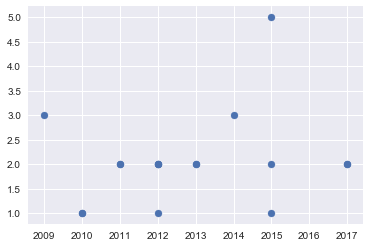

In [338]:
from matplotlib import pyplot as plt
star_ints = [int(stars) for stars in stars]
date_ints = [int(final_dates) for final_dates in final_dates]
date_ints
plt.scatter(date_ints, star_ints)
#takeaway: need more data

In [130]:
#filter by name, then location, then look @ dates for the review, -- Starbucks

#case study: Starbucks
print ("occurrences of starbucks in the business database: ")
business.loc[business.name == 'Starbucks', 'name'].count()
starbucks_matrix = business.where(business.name == 'Starbucks').dropna()
starbucks_matrix

occurrences of starbucks in the business database: 


,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,neighborhood,postal_code,review_count,stars,state
117,One Oxford Centre,"{'BusinessParking': {'garage': True, 'street':...",EQEjBxW64QzleZHvRYA31A,"[Coffee & Tea, Bakeries, Food]",Pittsburgh,"{'Friday': '5:30-18:30', 'Tuesday': '5:30-18:3...",1.0,40.438070,-79.998282,Starbucks,Downtown,15219,4.0,4.0,PA
534,3175 E Thomas Rd,"{'BusinessParking': {'garage': False, 'street'...",t6SfYTEvg0o_cfJddsqEcg,"[Food, Coffee & Tea]",Phoenix,{},1.0,33.480035,-112.013366,Starbucks,,85016,28.0,2.5,AZ
542,6080 W Badura Ave,"{'GoodForMeal': {'dessert': False, 'latenight'...",qsEbriXbvQVaORyJSkCEzQ,"[Coffee & Tea, Food]",Enterprise,"{'Monday': '5:00-21:00', 'Tuesday': '5:00-21:0...",1.0,36.062725,-115.224341,Starbucks,Spring Valley,89118,66.0,3.0,NV
727,1 W Dayton St,"{'BusinessParking': {'garage': True, 'street':...",ll9PWPSzuHudE8J1BT1G2A,"[Coffee & Tea, Food]",Madison,"{'Monday': '6:00-20:00', 'Tuesday': '6:00-20:0...",1.0,43.075613,-89.386584,Starbucks,Capitol,53703,3.0,4.0,WI
869,"4605 E Chandler Blvd, Ste A","{'BusinessParking': {'garage': False, 'street'...",0AJF-USLN6K5T4caooDdjw,"[Coffee & Tea, Food]",Phoenix,"{'Monday': '5:00-20:00', 'Tuesday': '5:00-20:0...",1.0,33.304429,-111.983626,Starbucks,,85048,52.0,3.0,AZ
1154,3130 W Carefree Hwy,"{'BusinessParking': {'garage': False, 'street'...",UHrr3z6DEPvJbLX9uQXVtg,"[Coffee & Tea, Food]",Phoenix,"{'Monday': '5:00-20:00', 'Tuesday': '5:00-20:0...",1.0,33.799752,-112.126752,Starbucks,,85086,13.0,2.5,AZ
1316,Caesars Palace Forum Shops Mall,"{'BusinessParking': {'garage': True, 'street':...",cnBo56U9Js_OwZ7gmSsUnw,"[Food, Bakeries, Coffee & Tea]",Las Vegas,"{'Monday': '7:00-23:00', 'Tuesday': '7:00-23:0...",1.0,36.119051,-115.174819,Starbucks,The Strip,89109,11.0,2.5,NV
1418,2727 W Bell Rd,"{'BusinessParking': {'garage': False, 'street'...",ziTL7YYUZykEWzGEvO5Gsw,"[Food, Coffee & Tea]",Phoenix,{},1.0,33.638699,-112.120067,Starbucks,,85053,5.0,3.5,AZ
2102,2901 Bayview Avenue,"{'BusinessParking': {'garage': False, 'street'...",UiZt3qTdvMrfDAMotWfXxw,"[Food, Coffee & Tea, Restaurants, Cafes]",North York,"{'Monday': '9:30-22:00', 'Tuesday': '9:30-22:0...",1.0,43.768686,-79.383886,Starbucks,Bayview Village,M2K 1E6,8.0,2.5,ON
2187,7409 W Virginia Ave,"{'BusinessParking': {'garage': False, 'street'...",t_YLVHvWU7OB223l82U9KQ,"[Coffee & Tea, Food]",Phoenix,{},1.0,33.475735,-112.218332,Starbucks,,85035,7.0,3.0,AZ


In [140]:
#sorting all the starbucks locations by address
starbucks_matrix.groupby('address').count().sort_values(by = 'state', ascending=False)

,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,neighborhood,postal_code,review_count,stars,state
address,,,,,,,,,,,,,,
4123 W Thunderbird Rd,3,3,3,3,3,3,3,3,3,3,3,3,3,3
3799 Las Vegas Blvd S,3,3,3,3,3,3,3,3,3,3,3,3,3,3
5501 Josh Birmingham Pkwy,3,3,3,3,3,3,3,3,3,3,3,3,3,3
,2,2,2,2,2,2,2,2,2,2,2,2,2,2
1400 E Carson St,2,2,2,2,2,2,2,2,2,2,2,2,2,2
3720 S Las Vegas Blvd,2,2,2,2,2,2,2,2,2,2,2,2,2,2
Santan Village Pkwy,2,2,2,2,2,2,2,2,2,2,2,2,2,2
3400 Las Vegas Blvd S,2,2,2,2,2,2,2,2,2,2,2,2,2,2
5757 Wayne Newton Blvd,2,2,2,2,2,2,2,2,2,2,2,2,2,2


In [138]:
#sorting all the starbucks locations by postal code 
#postal_code 89109 is in Nevada
starbucks_matrix.groupby('postal_code').count().sort_values(by = 'state', ascending = False)

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,neighborhood,review_count,stars,state
postal_code,,,,,,,,,,,,,,
89109,30,30,30,30,30,30,30,30,30,30,30,30,30,30
85281,12,12,12,12,12,12,12,12,12,12,12,12,12,12
89119,11,11,11,11,11,11,11,11,11,11,11,11,11,11
85016,8,8,8,8,8,8,8,8,8,8,8,8,8,8
85260,8,8,8,8,8,8,8,8,8,8,8,8,8,8
85032,7,7,7,7,7,7,7,7,7,7,7,7,7,7
85004,7,7,7,7,7,7,7,7,7,7,7,7,7,7
89052,7,7,7,7,7,7,7,7,7,7,7,7,7,7
85308,6,6,6,6,6,6,6,6,6,6,6,6,6,6


In [139]:
starbucks_matrix.where(starbucks_matrix.postal_code == '89109').dropna()

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,neighborhood,postal_code,review_count,stars,state
1316,Caesars Palace Forum Shops Mall,"{'BusinessParking': {'garage': True, 'street':...",cnBo56U9Js_OwZ7gmSsUnw,"[Food, Bakeries, Coffee & Tea]",Las Vegas,"{'Monday': '7:00-23:00', 'Tuesday': '7:00-23:0...",1.0,36.119051,-115.174819,Starbucks,The Strip,89109,11.0,2.5,NV
6932,3950 S Las Vegas Blvd,"{'Alcohol': 'none', 'Caters': False, 'HasTV': ...",94mHPEWCqcHULzEfhvcl9Q,"[Food, Coffeeshops, Desserts, Coffee & Tea, Ni...",Las Vegas,"{'Monday': '6:00-21:00', 'Tuesday': '6:00-21:0...",1.0,36.093288,-115.175942,Starbucks,The Strip,89109,49.0,2.5,NV
18092,3200 Las Vegas Blvd,"{'GoodForMeal': {'dessert': False, 'latenight'...",Pez0F_KbTNquM5OuJVgnJQ,"[Coffee & Tea, Food]",Las Vegas,{},1.0,36.127437,-115.170048,Starbucks,The Strip,89109,42.0,2.0,NV
37822,3799 Las Vegas Blvd S,"{'BusinessParking': {'garage': True, 'street':...",X-5sPnd7SHvOWYNplJf9qw,"[Coffee & Tea, Food]",Las Vegas,"{'Monday': '0:00-0:00', 'Tuesday': '0:00-0:00'...",1.0,36.102324,-115.168918,Starbucks,The Strip,89109,35.0,2.5,NV
38269,"3475 Las Vegas Blvd, Fl 2, Harrahs Casino Lv L...","{'BusinessParking': {'garage': True, 'street':...",_iUq8i7GmSXDOsuM0UiQCg,"[Food, Coffee & Tea]",Las Vegas,"{'Monday': '0:00-0:00', 'Tuesday': '0:00-0:00'...",1.0,36.119302,-115.170387,Starbucks,The Strip,89109,65.0,2.5,NV
41876,3545 S Las Vegas Blvd,"{'BusinessParking': {'garage': True, 'street':...",iO5i5ZT5HHUoDtQr0hD-FQ,"[Food, Coffee & Tea]",Las Vegas,{},1.0,36.117358,-115.172290,Starbucks,The Strip,89109,41.0,2.5,NV
44690,3150 Paradise Rd,"{'BusinessParking': {'garage': False, 'street'...",im3uP8td_AEUFVyW_t_VSQ,"[Coffee & Tea, Food]",Las Vegas,{},1.0,36.133352,-115.153885,Starbucks,Eastside,89109,23.0,2.5,NV
46440,3400 Las Vegas Blvd S,"{'BusinessParking': {'garage': False, 'street'...",UOo1gVPvikk6UjRhet8GxQ,"[Coffee & Tea, Food]",Las Vegas,"{'Tuesday': '5:30-1:00', 'Friday': '5:30-1:00'...",1.0,36.121885,-115.176678,Starbucks,The Strip,89109,9.0,2.0,NV
48190,3752 Las Vegas Blvd S,"{'BusinessParking': {'garage': False, 'street'...",zUc67X2Tn8Xi1bJFvOX2fA,"[Food, Coffee & Tea]",Las Vegas,{},1.0,36.106297,-115.173476,Starbucks,The Strip,89109,20.0,2.5,NV
50054,3400 Las Vegas Blvd S,"{'Alcohol': 'none', 'HasTV': False, 'WiFi': 'f...",1d4OiPU75_KvXkgiBD35-g,"[Nightlife, Food, Desserts, Coffeeshops, Coffe...",Las Vegas,"{'Monday': '5:30-1:00', 'Tuesday': '5:30-1:00'...",1.0,36.120601,-115.176838,Starbucks,The Strip,89109,39.0,2.5,NV


In [161]:
reviews.head(1)

,business_id,cool,date,funny,review_id,stars,text,useful,user_id
0,uYHaNptLzDLoV_JZ_MuzUA,0,2016-07-12,0,VfBHSwC5Vz_pbFluy07i9Q,5,My girlfriend and I stayed here for 3 nights a...,0,cjpdDjZyprfyDG3RlkVG3w
